In [201]:
#Import Helper Libraries 
import pandas as pd
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, cross_validation #scale, regresions, cross shuffle stats sepeareate data
from matplotlib import style
from datetime import datetime
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, cross_validation #scale, regresions, cross shuffle stats sepeareate data

In [202]:
#Import Keras 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding

In [203]:
#Choose any style you like for data visualization with Matplotlib
style.use('bmh')

In [204]:
#Load the CSV file of a stock you want, yahoo is a good source
#Put the path in
address_1 = '/Users/anyaozmen/Downloads/GARAN.csv'

In [205]:
# Load Data
def parse(x):
    return datetime.strptime(x,'%Y-%m-%d')
df = pd.read_csv(address_1,  parse_dates = ['Date'], index_col=0, date_parser=parse)

In [206]:
# remove the # below see df
#print(df)

In [212]:
#Drop unknown values
df = df.dropna()

In [208]:
#Calculate high - low percentage
df['High_Low_Percent'] = (df['High'] - df['Low']) / df['Adj Close']*100
#Calculate percent change
df['Percent_Change'] = (df['Open'] - df['Close']) / df['Close']*100
#put these in the dataframe
df = df[['Adj Close','High_Low_Percent','Percent_Change','Volume']]

In [209]:
#Display df
#df

In [14]:
forecast_column = 'Adj Close'

In [16]:
#math.ceil rounds to the top
out = int(math.ceil(0.009*len(df)))

In [17]:
df['label'] = df[forecast_column].shift(-out)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
#Deaures is X, Labels is Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X) #scale data
X = X[:-out:]
X_lately = X[-out:] 

In [21]:
df.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
y = np.array(df['label'])

In [305]:
#Make sure the lenghts are inplace so that the fit method will run properly
#len(X)
#len(y) 

In [25]:
#Split the data into train and test data
#You can adjust the test_size to change the train size to test size ratio
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [292]:
#Let's make our model!
model = Sequential()
#model.add(Flatten())
model.add(Dense(40,input_shape=(4,) , activation = 'selu'))
#model.add(Flatten())
model.add(Dense(4, activation = 'selu'))
model.add(Dense(1, activation ='selu')) 

In [293]:
#Compile the model, because this is a regression accuracy can't be used
model.compile(optimizer='Adam', loss= 'mean_squared_error')

In [294]:
#Train model
model.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
967/967 [==============================] - 1s 680us/step - loss: 56.5656
Epoch 2/100
967/967 [==============================] - 0s 132us/step - loss: 29.5727
Epoch 3/100
967/967 [==============================] - 0s 146us/step - loss: 6.5246
Epoch 4/100
967/967 [==============================] - 0s 122us/step - loss: 0.7021
Epoch 5/100
967/967 [==============================] - 0s 114us/step - loss: 0.3255
Epoch 6/100
967/967 [==============================] - 0s 113us/step - loss: 0.3066
Epoch 7/100
967/967 [==============================] - 0s 118us/step - loss: 0.3008
Epoch 8/100
967/967 [==============================] - 0s 123us/step - loss: 0.2940
Epoch 9/100
967/967 [==============================] - 0s 137us/step - loss: 0.2903
Epoch 10/100
967/967 [==============================] - 0s 143us/step - loss: 0.2840
Epoch 11/100
967/967 [==============================] - 0s 137us/step - loss: 0.2790
Epoch 12/100
967/967 [==============================] - 0s 142us/step - 

In [295]:
#Let's Evaluate our model
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names, (score*100)))

323/323 [==============================] - 0s 322us/step
['loss']: 27.47%


In [296]:
model.save('stock_1.model')

In [297]:
#Predictions
pred = model.predict([X_test])
pred = pred.round(1)
prediction = pd.DataFrame(pred, columns = ['pred']) 
#pred

In [298]:
#Let's put the real Adj Close values of our predictions into a dataframe
compare = pd.DataFrame(y_test,columns = ['com'])
compare = compare.round(1)
#compare

In [300]:
#These are the dates we predicted
#let's make a dataframe with those to layout real and predicted valeus
values = pd.date_range("2018-01-31","2018-12-19")
values = pd.DataFrame(data=values, columns = ['date'])
#values

In [301]:
plot_pred = values.join(prediction)
plot_val = values.join(compare)
plot_val.index = plot_val['date'] 
plot_val.drop(['date'], axis=1, inplace =True)
#plot_val
plot_pred.index = plot_pred['date']
plot_pred.drop(['date'], axis=1, inplace =True)
#plot_pred

In [302]:
#A new dataframe with all the values
new = pd.concat([plot_val, plot_pred], axis=1, sort=False)
#new

In [307]:
#Let's see the interactions of the real and predicted
#These are the times the model predicted accurately
i = new['com']
ii= new['pred']
a = new.where(i == ii)
a.dropna(inplace =True)
a

,com,pred
date,,
2018-04-21,7.5,7.5
2018-06-05,6.5,6.5
2018-09-01,7.5,7.5
2018-09-06,7.0,7.0
2018-10-14,8.0,8.0
2018-12-13,7.0,7.0


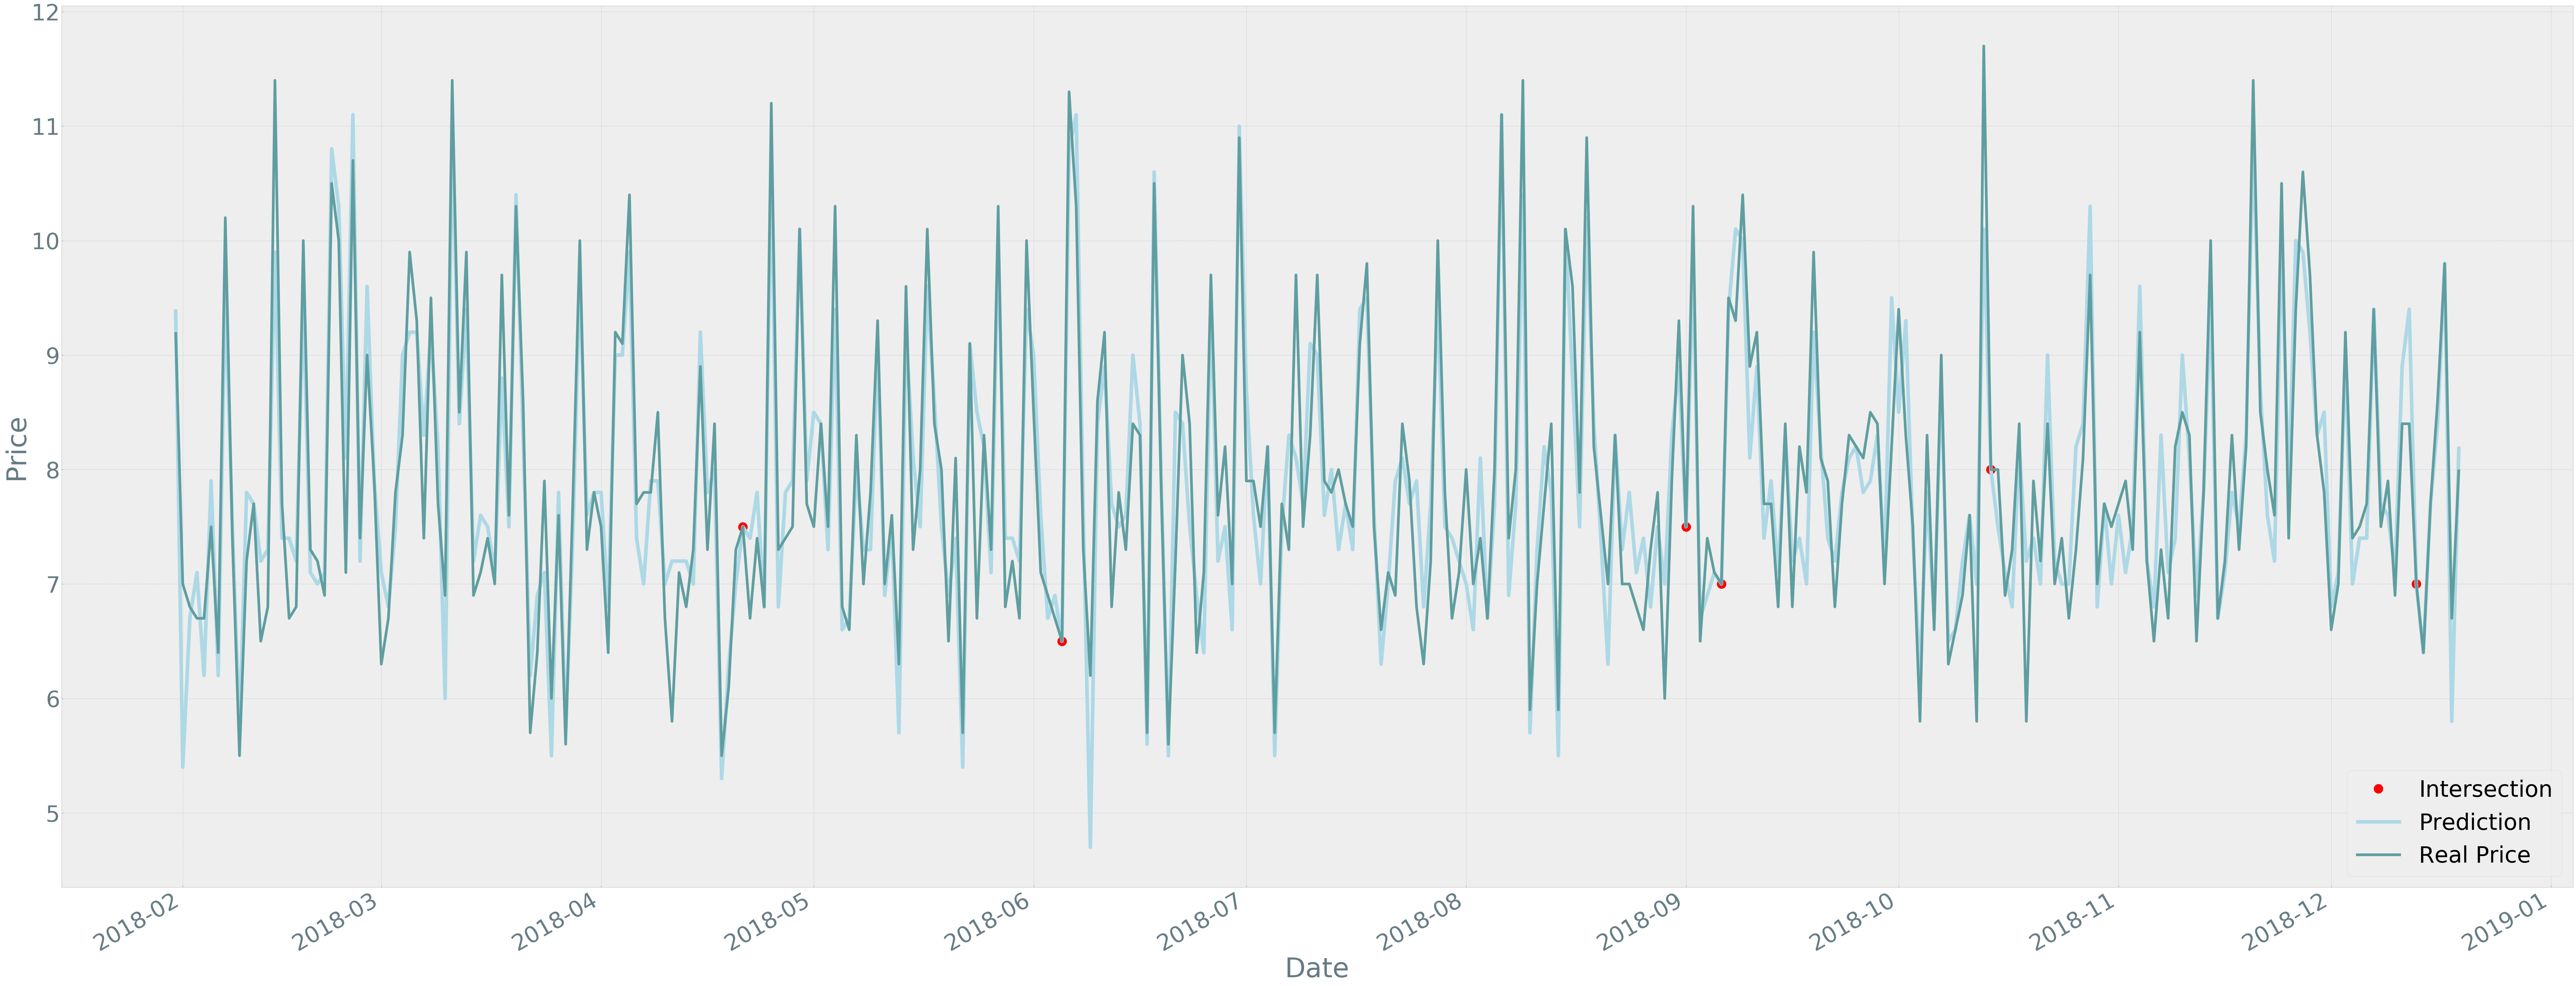

In [304]:
#Plot to see Predictions, Real Price and Intersections
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(100, 40), dpi=100, facecolor='w')
a['com'].plot(style=".", markersize=40, color='red', label='Intersection')
new['pred'].plot(color = 'lightblue', label='Prediction', linewidth=8)
new['com'].plot(color = 'cadetblue', label='Real Price', linewidth=6)
plt.legend(loc=4, prop={'size': 50})
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams.update({'font.size': 50})
plt.show()